In [2]:
using Revise
using CairoMakie      # For plotting (incluing tableau diagrams)
using Quantikz        # For drawing quantum circuits
using QuantumClifford # For quantum Clifford circuits
using QuantumClifford.ECC: parity_checks, Steane7, Shor9, naive_syndrome_circuit
using LinearAlgebra

In [3]:
include("util/CSS_builder.jl")
include("util/QECC_Decoders.jl")
include("util/QECC_Tests.jl")

using .CSS_Builder
using .QECC_Decoders
using .QECC_Tests

## Quantum Error Correction

### Steane's 7-qubit code

In [3]:
codeˢᵗᵉᵃⁿᵉ = parity_checks(Steane7())

+ ___XXXX
+ _XX__XX
+ X_X_X_X
+ ___ZZZZ
+ _ZZ__ZZ
+ Z_Z_Z_Z

  0.527296 seconds (6.03 M allocations: 209.202 MiB, 12.05% gc time, 33.95% compilation time)


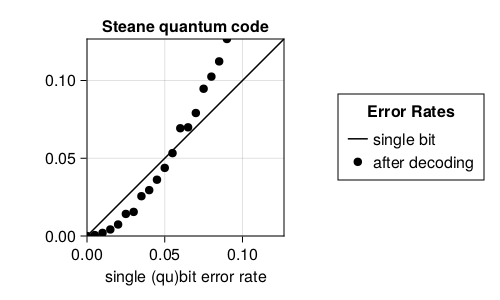

In [4]:
error_rates = 0.000:0.005:0.09
steane_table = create_lookup_table(codeˢᵗᵉᵃⁿᵉ)
@time post_ec_error_rates = [evaluate_code_decoder(codeˢᵗᵉᵃⁿᵉ, steane_table, p) for p in error_rates]
plot_code_performance(error_rates, post_ec_error_rates, title="Steane quantum code")

### Bicycle QECC

In [5]:
steane_table = create_lookup_table(codeˢᵗᵉᵃⁿᵉ);

In [4]:
bn = 3;
dn = 3;
bset = BicycleSetGen(bn)
b7 = AssembleCSS(Circ2BicycleH(bset, bn));
bxt = GetXTableau(b7)
bzt = GetZTableau(b7)
# b7 = AssembleCSS(b7h, b7h);
bphase_arr = fill(0x0, 2*bn);
sb14 = Stabilizer(bphase_arr, bxt, bzt)

+ XX_X_X
+ _XXXX_
+ X_X_XX
+ ZZ_Z_Z
+ _ZZZZ_
+ Z_Z_ZZ

In [7]:
bn = 7
b7 = AssembleCSS(Circ2BicycleH(BicycleSetGen(bn), bn));
sb14 = Stabilizer(fill(0x0, 2*bn), GetXTableau(b7), GetZTableau(b7))

+ XX_X___X___X_X
+ _XX_X__XX___X_
+ __XX_X__XX___X
+ ___XX_XX_XX___
+ X___XX__X_XX__
+ _X___XX__X_XX_
+ X_X___X___X_XX
+ ZZ_Z___Z___Z_Z
+ _ZZ_Z__ZZ___Z_
+ __ZZ_Z__ZZ___Z
+ ___ZZ_ZZ_ZZ___
+ Z___ZZ__Z_ZZ__
+ _Z___ZZ__Z_ZZ_
+ Z_Z___Z___Z_ZZ

In [8]:
print(is_degenerate(sb14))

false

In [27]:
bicycle_table = create_lookup_table(sb14);

  0.781659 seconds (11.13 M allocations: 368.786 MiB, 11.18% gc time, 2.48% compilation time)


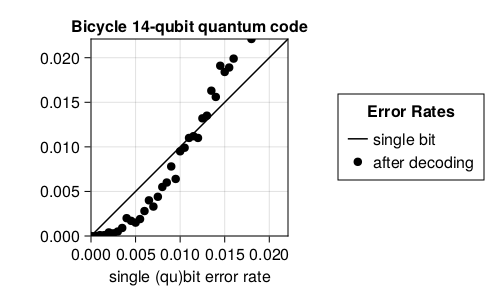

In [10]:
error_rates = 0.000:0.0005:0.018
@time post_ec_error_rates = [evaluate_code_decoder(sb14, bicycle_table, p) for p in error_rates]
plot_code_performance(error_rates, post_ec_error_rates, title="Bicycle 14-qubit quantum code")

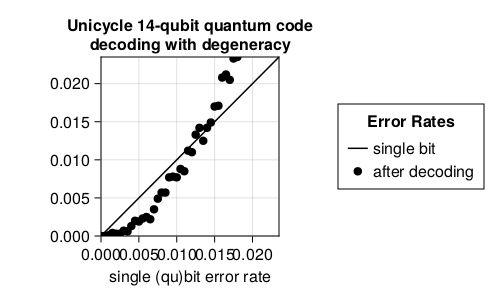

In [25]:
error_rates = 0.000:0.0005:0.018
post_ec_error_rates = [evaluate_degen_code_decoder(sb14, bicycle_table, p) for p in error_rates]
plot_code_performance(error_rates, post_ec_error_rates, title="Bicycle 14-qubit quantum code\ndecoding with degeneracy")

### Unicycle QECC

In [1]:
un = 13
uset = [1, 2, 5, 7]
u14 = AssembleCSS(Circ2UnicycleH(uset, un));
# su14 = Stabilizer(fill(0x0, 2*un), GetXTableau(u14), GetZTableau(u14))

UndefVarError: UndefVarError: `Circ2UnicycleH` not defined

In [6]:
print(is_degenerate(su14))

false

In [28]:
unicycle_table = create_lookup_table(su14);

  0.745540 seconds (11.13 M allocations: 374.432 MiB, 10.86% gc time, 2.74% compilation time)


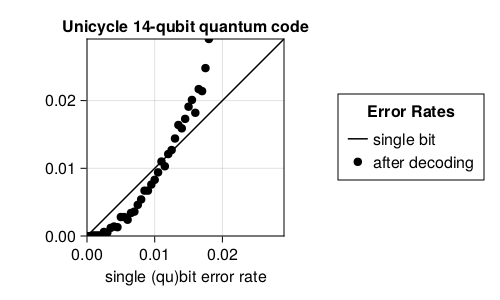

In [14]:
error_rates = 0.000:0.0005:0.018
@time post_ec_error_rates = [evaluate_code_decoder(su14, unicycle_table, p) for p in error_rates]
plot_code_performance(error_rates, post_ec_error_rates, title="Unicycle 14-qubit quantum code")

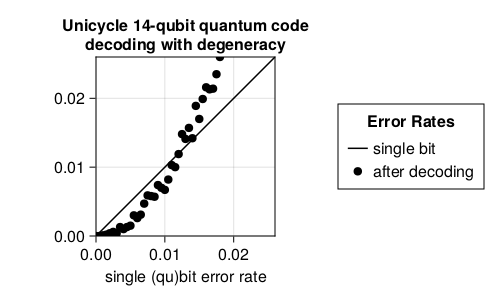

In [15]:
error_rates = 0.000:0.0005:0.018
post_ec_error_rates = [evaluate_degen_code_decoder(su14, unicycle_table, p) for p in error_rates]
plot_code_performance(error_rates, post_ec_error_rates, title="Unicycle 14-qubit quantum code\ndecoding with degeneracy")

### Shor's 9-qubit code

In [16]:
codeˢʰᵒʳ = parity_checks(Shor9())

+ ZZ_______
+ _ZZ______
+ ___ZZ____
+ ____ZZ___
+ ______ZZ_
+ _______ZZ
+ XXXXXX___
+ ___XXXXXX

In [17]:
print(is_degenerate(codeˢʰᵒʳ))

true

In [18]:
full_tableau = MixedDestabilizer(codeˢʰᵒʳ)
print(full_tableau)
logicals = vcat(logicalxview(full_tableau),logicalzview(full_tableau))
logicals # the logical observables

𝒟ℯ𝓈𝓉𝒶𝒷━━━━━
+ Z________
+ ___Z_____
+ _X_______
+ __X______
+ ____X____
+ _____X___
+ ______X__
+ _______X_
𝒳ₗ━━━━━━━━━
+ ______XXX
𝒮𝓉𝒶𝒷━━━━━━━
+ XXX___XXX
+ ___XXXXXX
+ ZZ_______
+ Z_Z______
+ ___ZZ____
+ ___Z_Z___
+ ______Z_Z
+ _______ZZ
𝒵ₗ━━━━━━━━━0
+ Z__Z____Z

+ ______XXX
+ Z__Z____Z

  0.833240 seconds (14.87 M allocations: 563.022 MiB, 13.84% gc time, 2.12% compilation time)


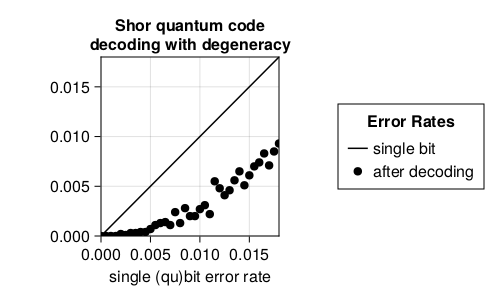

In [19]:
shor_table = create_lookup_table(codeˢʰᵒʳ)
@time post_ec_error_rates = [evaluate_degen_code_decoder(codeˢʰᵒʳ, shor_table, p) for p in error_rates]
plot_code_performance(error_rates, post_ec_error_rates, title="Shor quantum code\ndecoding with degeneracy")

In [20]:
error_rates = 0.000:0.0025:0.02
@time post_ec_error_rates = [evaluate_code_decoder_noisy_circuit(codeˢᵗᵉᵃⁿᵉ, steane_table, p, 0.0) for p in error_rates]
plot_code_performance(error_rates, post_ec_error_rates, title="Steane quantum code")

UndefVarError: UndefVarError: `make_noisy` not defined

In [21]:
error_rates = 0.000:0.0025:0.02
@time post_ec_error_rates = [evaluate_code_decoder_noisy_circuit(codeˢᵗᵉᵃⁿᵉ, steane_table, p, p) for p in error_rates]
plot_code_performance(error_rates, post_ec_error_rates, title="Steane quantum code")

UndefVarError: UndefVarError: `make_noisy` not defined

In [22]:
error_rates = 0.000:0.0025:0.02
@time post_ec_error_rates = [evaluate_code_decoder_noisy_circuit(sb14, bicycle_table, p, 0.0) for p in error_rates]
plot_code_performance(error_rates, post_ec_error_rates, title="Steane quantum code")

UndefVarError: UndefVarError: `make_noisy` not defined

In [23]:
error_rates = 0.000:0.0025:0.02
@time post_ec_error_rates = [evaluate_code_decoder_noisy_circuit(sb14, steane_table, p, p/50) for p in error_rates]
plot_code_performance(error_rates, post_ec_error_rates, title="Steane quantum code")

UndefVarError: UndefVarError: `make_noisy` not defined